# Rabbit Challenge 深層学習 Day 1 修了課題
## 構造図
今回は分類を予測するモデルを構築している。モデルの簡単な構造図は以下の通り。
![](images/structure.jpg)
なおハイパーパラメータに関しては何度か調整を繰り返し、以下の値に設定した。
- 中間層の層数：3
- 各中間層のノード数：各100
- 繰り返し数（イテレータ）：20000
- ミニバッチサイズ：150
- 学習率：0.01


## 考察
　今回は課題ということであえて中間層を3層に増やして実装しているが、Irisデータセットの規模であれば中間層が1層でも十分な精度が出せると思われる。それについては末尾に比較のための「中間層2層のモデル」「中間層1層のモデル」のコードを参考情報として残す。  
　また、中間層が増えると収束し始めるタイミングが遅くなり、中間層のノードを増やすと収束し始めるタイミングが早くなることも確認した。
   

## ソースコード
## 1. 必要なモジュールのインポートおよびIrisデータセットのロード

In [1]:
from keras.utils.np_utils import to_categorical
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 活性化関数・誤差関数をもつfunctionをインポートする。
from common import functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Irisデータセットのロード
iris = datasets.load_iris()

## 2. Irisデータセットの情報の確認（※省略可能）

Irisデータセットの説明の確認およびグラフの描画をしてみる。
「2. 」は飛ばしても問題ない。

In [ ]:
# Irisデータセットの情報の確認。
print(iris['DESCR'])

### Irisデータセットの概要

Number of Instances: 150 (50 in each of three classes)  
　　→インスタンス数：150（3分類50ずつ）  
Number of Attributes: 4 numeric, predictive attributes and the class  
　　→属性：4つの予測属性値と分類（3種類）  

Attribute Information:属性情報
  - sepal length in cm	がく片の長さ（cm）
  - sepal width in cm		がく片の幅（cm）
  - petal length in cm	花弁の長さ（c）m
  - petal width in cm		花弁の幅（cm）
  - class:
      - Iris-Setosa（ヒオウギアヤメ）
      - Iris-Versicolour（ブルーフラッグ）
      - Iris-Virginica（バージニカ）

Summary Statistics（要約統計）:

|              |最小|最大|平均|標準偏差|クラス相関|  
|--------------|:----:|:----:|:----:|:----:|:----:|  
|sepal length: |4.3 | 7.9| 5.84| 0.83| 0.7826|  
|sepal width:  |2.0 | 4.4| 3.05| 0.43|-0.4194| 
|petal length: |1.0 | 6.9| 3.76| 1.76| 0.9490 (high!) | 
|petal width:  |0.1 | 2.5| 1.20| 0.76| 0.9565 (high!)|  

In [ ]:
# データ内容の確認。
# Irisデータにおける分類の名称の確認。
print(iris.target_names)
# 各データの分類の確認。分類はインデックスで持つ。
print(iris.target)
# Irisデータにおける各属性の名称の確認。
print(iris.feature_names)
# 各属性のデータの確認
print(iris.data)

### 散布図によるデータの分布の描画
下の2つの図は各Irisに関する散布図であり、  
　・ひとつめの図：「x = sepal length（がく片の長さ）, y = sepal width（がく片の幅）」による分布  
　・ふたつめの図：「x = petal length（花弁の長さ）, y = petal width（花弁の幅）」による分布  
となっている。  
ひとつめの図では「Setosa」は比較的きれいに分かれているが、「Versicolour」および「Verginica」は重なってしまっているところがある。ふたつめの図ではひとつめの図に比べ「Setosa」「Versicolour」「Verginica」すべて比較的きれいに分かれている。 
これについては花弁の長さ、幅は品種との相関が高いということがデータセットの説明にも記載されており、単にそれが図に表れているものを考えられる。
この2図のみで判断するのはやや乱暴ではあるが、がく片の長さと幅だけではなく、花弁の長さと幅を含めた4つの特徴を使用すればあやめの品種を分類するモデルの作成は可能だろうことが推察できる。  

In [ ]:
# 「x = sepal length（がく片の長さ）, y = sepal width（がく片の幅）」による分布の散布図での描画
X1 = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
y_min, y_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X1[iris.target==0, 0], X1[iris.target==0, 1], c='red',
            edgecolor='k', label=iris.target_names[0])
plt.scatter(X1[iris.target==1, 0], X1[iris.target==1, 1], c='yellow',
            edgecolor='k', label=iris.target_names[1])
plt.scatter(X1[iris.target==2, 0], X1[iris.target==2, 1], c='green',
            edgecolor='k', label=iris.target_names[2])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.legend()
plt.show()

# 「x = petal length（花弁の長さ）, y = petal width（花弁の幅）」による分布の散布図での描画
X2 = iris.data[:, 2:]  # we only take the last two features.
y = iris.target

x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5

plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X2[iris.target==0, 0], X2[iris.target==0, 1], c='red',
            edgecolor='k', label=iris.target_names[0])
plt.scatter(X2[iris.target==1, 0], X2[iris.target==1, 1], c='yellow',
            edgecolor='k', label=iris.target_names[1])
plt.scatter(X2[iris.target==2, 0], X2[iris.target==2, 1], c='green',
            edgecolor='k', label=iris.target_names[2])

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.legend()

## 3. 学習データ・検証データの作成

Irisデータはデータ数が多いわけではないため各分類のデータは均等に学習データおよび検証データに振り分けたい。
そのため、事前に各分類ごとに分けたうえで学習データ、検証データに分割し、最後に各分類の学習データ、検証データを統合する。

In [3]:
# Irisデータをpandas.DataFrameの形に整形
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['classification'] = np.array(iris.target)

In [4]:
# テストデータの作成
# 作成したDataFrameより、使用するデータを抽出
# データ
data = df_iris.loc[:, ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]].values
# ラベル
label = df_iris.loc[:, ["classification"]].values
label = to_categorical(label)

# 各分類ごとにデータを分割
# データ
data_0, data_1, data_2 = np.split(data, 3)
# ラベル
label_0, label_1, label_2 = np.split(label, 3)

# 各分類での学習データおよび検証データの作成
x_train_0, x_test_0, d_train_0, d_test_0 = train_test_split(data_0, label_0, test_size=0.2)
x_train_1, x_test_1, d_train_1, d_test_1 = train_test_split(data_1, label_1, test_size=0.2)
x_train_2, x_test_2, d_train_2, d_test_2 = train_test_split(data_2, label_2, test_size=0.2)

# 各学習データ、検証データを統合する。
# データ
x_train = np.r_[x_train_0, x_train_1, x_train_2]
x_test = np.r_[x_test_0, x_test_1, x_test_2]
# ラベル
d_train = np.r_[d_train_0, d_train_1, d_train_2]
d_test = np.r_[d_test_0, d_test_1, d_test_2]

# 訓練データの長さを取得
train_size = len(x_train)

In [5]:
# テストデータの作成
# 作成したDataFrameより、使用するデータを抽出
# データ
data = df_iris.loc[:, ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]].values
# ラベル
label = df_iris.loc[:, ["classification"]].values
label = to_categorical(label)

x_train, x_test, d_train, d_test = train_test_split(data, label, test_size=0.2)

# 訓練データの長さを取得
train_size = len(x_train)

## 4. モデルの学習と評価
### 4.1. 学習

In [6]:
#ハイパーパラメータの設定

# 重み初期値補正係数
l3_weight_init = 0.01
#入力層サイズ
l3_input_layer_size = 4
#中間層サイズ
l3_hidden_layer_size1 = 100
l3_hidden_layer_size2 = 100
l3_hidden_layer_size3 = 100
#出力層サイズ
l3_output_layer_size = 3
# 繰り返し数
l3_iters_num = 20000
# ミニバッチサイズ
l3_batch_size = 150
# 学習率
l3_learning_rate = 0.01
# 描写頻度
l3_plot_interval=400

In [7]:
# 初期設定
def l3_init_network():
    network = {} 
    network['W1'] = l3_weight_init * np.random.randn(l3_input_layer_size, l3_hidden_layer_size1)
    network['W2'] = l3_weight_init * np.random.randn(l3_hidden_layer_size1, l3_hidden_layer_size2)
    network['W3'] = l3_weight_init * np.random.randn(l3_hidden_layer_size2, l3_hidden_layer_size3)
    network['W4'] = l3_weight_init * np.random.randn(l3_hidden_layer_size3, l3_output_layer_size)

    network['b1'] = np.zeros(l3_hidden_layer_size1)
    network['b2'] = np.zeros(l3_hidden_layer_size2)
    network['b3'] = np.zeros(l3_hidden_layer_size3)
    network['b4'] = np.zeros(l3_output_layer_size)

    return network

# 順伝播
def l3_forward(network, x):
    W1, W2, W3, W4 = network['W1'], network['W2'], network['W3'], network['W4']
    b1, b2, b3, b4 = network['b1'], network['b2'], network['b3'], network['b4']
        
    u1 =  np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    u2 =  np.dot(z1, W2) + b2
    z2 = functions.relu(u2)
    
    u3 =  np.dot(z2, W3) + b3
    z3 = functions.relu(u3)
    
    u4 =  np.dot(z3, W4) + b4
    y = functions.softmax(u4)
 
    return z1, z2, z3, y

# 誤差逆伝播
def l3_backward(network, x, d, z1, z2, x3, y):
    grad = {}
    
    W1, W2, W3, W4 = network['W1'], network['W2'], network['W3'], network['W4']
    b1, b2, b3, b4 = network['b1'], network['b2'], network['b3'], network['b4']
    
    # 出力層でのデルタ
    delta4 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b4'] = np.sum(delta4, axis=0)
    # W3の勾配
    grad['W4'] = np.dot(z3.T, delta4)
    
    # 中間3層でのデルタ
    delta3 = np.dot(delta4, W4.T) * functions.d_relu(z3)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W2の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    
    # 中間2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * functions.d_relu(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    
    # 中間1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# 正答率と誤差
def l3_accuracy_and_loss(network, x, d):
    z1, z2, z3, y = l3_forward(network, x)
    # 誤差の取得
    loss = functions.cross_entropy_error(d, y)
    # 正答率の取得
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    
    return accuracy, loss

In [8]:
# パラメータの初期化
l3_network = l3_init_network()

# グラフ描画の為の配列
# 学習時および検証時の正答率
l3_accuracies_train = []
l3_accuracies_test = []

l3_losses_train = []
l3_losses_test = []

for i in range(l3_iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, l3_batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]
    
    z1, z2, z3, y = l3_forward(l3_network, x_batch)
    grad = l3_backward(l3_network, x_batch, d_batch, z1, z2, z3, y)

    if (i+1)%l3_plot_interval==0:
        accr_train, loss_train = l3_accuracy_and_loss(l3_network, x_batch, d_batch)
        l3_accuracies_train.append(accr_train)
        l3_losses_train.append(loss_train)
    
        accr_test, loss_test = l3_accuracy_and_loss(l3_network, x_test, d_test)
        l3_accuracies_test.append(accr_test)
        l3_losses_test.append(loss_test)
        
        print('Generation: ' + str(i+1) + '  accr_train = ' + '{:.3f}'.format(accr_train)
              + 'm accr_test = ' + '{:.3f}'.format(accr_test) 
              + ', loss_train = ' + '{:.3f}'.format(loss_train)
              + ', loss_test = ' + '{:.3f}'.format(loss_test))
    
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'W4', 'b1', 'b2', 'b3', 'b4'):
        l3_network[key]  -= l3_learning_rate * grad[key]

Generation: 400  accr_train = 0.440m accr_test = 0.267, loss_train = 1.090, loss_test = 1.108
Generation: 800  accr_train = 0.280m accr_test = 0.267, loss_train = 1.101, loss_test = 1.110
Generation: 1200  accr_train = 0.320m accr_test = 0.267, loss_train = 1.096, loss_test = 1.111
Generation: 1600  accr_train = 0.273m accr_test = 0.267, loss_train = 1.108, loss_test = 1.111
Generation: 2000  accr_train = 0.327m accr_test = 0.267, loss_train = 1.095, loss_test = 1.110
Generation: 2400  accr_train = 0.353m accr_test = 0.267, loss_train = 1.099, loss_test = 1.112
Generation: 2800  accr_train = 0.367m accr_test = 0.267, loss_train = 1.099, loss_test = 1.113
Generation: 3200  accr_train = 0.360m accr_test = 0.267, loss_train = 1.099, loss_test = 1.111
Generation: 3600  accr_train = 0.360m accr_test = 0.267, loss_train = 1.097, loss_test = 1.113
Generation: 4000  accr_train = 0.313m accr_test = 0.267, loss_train = 1.100, loss_test = 1.112
Generation: 4400  accr_train = 0.380m accr_test = 0.

### 4.2. 評価
次に「学習時と検証時の正答率（Accuracy）の推移」「学習時と検証時の誤差（loss）の」推移をそれぞれグラフ化する。

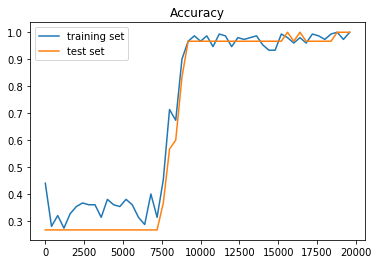

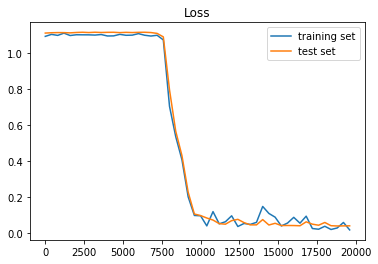

In [9]:
plt.clf()

l3_lists = range(0, l3_iters_num, l3_plot_interval)
plt.plot(l3_lists, l3_accuracies_train, label="training set")
plt.plot(l3_lists, l3_accuracies_test,  label="test set")
plt.legend(loc="best")
plt.title("Accuracy")
# グラフの表示
plt.show()

plt.clf()

l3_lists = range(0, l3_iters_num, l3_plot_interval)
plt.plot(l3_lists, l3_losses_train, label="training set")
plt.plot(l3_lists, l3_losses_test,  label="test set")
plt.legend(loc="best")
plt.title("Loss")
# グラフの表示
plt.show()

## 参考：中間層が2層、1層のモデル
### ・中間層2層の場合

In [10]:
#ハイパーパラメータの設定

# 重み初期値補正係数
l2_weight_init = 0.01
#入力層サイズ
l2_input_layer_size = 4
#中間層サイズ
l2_hidden_layer_size1 = 100
l2_hidden_layer_size2 = 100
#出力層サイズ
l2_output_layer_size = 3
# 繰り返し数
l2_iters_num = 10000
# ミニバッチサイズ
l2_batch_size = 150
# 学習率
l2_learning_rate = 0.01
# 描写頻度
l2_plot_interval=200

In [11]:
# 初期設定
def l2_init_network():
    network = {} 
    network['W1'] = l2_weight_init * np.random.randn(l2_input_layer_size, l2_hidden_layer_size1)
    network['W2'] = l2_weight_init * np.random.randn(l2_hidden_layer_size1, l2_hidden_layer_size2)
    network['W3'] = l2_weight_init * np.random.randn(l2_hidden_layer_size2, l2_output_layer_size)

    network['b1'] = np.zeros(l2_hidden_layer_size1)
    network['b2'] = np.zeros(l2_hidden_layer_size2)
    network['b3'] = np.zeros(l2_output_layer_size)

    return network

# 順伝播
def l2_forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
        
    u1 =  np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    u2 =  np.dot(z1, W2) + b2
    z2 = functions.relu(u2)
    
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def l2_backward(network, x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    
    # 中間2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * functions.d_relu(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    
    # 中間1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# 正答率と誤差
def l2_accuracy_and_loss(network, x, d):
    z1, z2, y = l2_forward(network, x)
    # 誤差の取得
    loss = functions.cross_entropy_error(d, y)
    # 正答率の取得
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    
    return accuracy, loss

In [12]:
# パラメータの初期化
l2_network = l2_init_network()

# グラフ描画の為の配列
# 学習時および検証時の正答率
l2_accuracies_train = []
l2_accuracies_test = []

l2_losses_train = []
l2_losses_test = []

for i in range(l2_iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, l2_batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]
    
    z1, z2, y = l2_forward(l2_network, x_batch)
    grad = l2_backward(l2_network, x_batch, d_batch, z1, z2, y)

    if (i+1)%l2_plot_interval==0:
        accr_train, loss_train = l2_accuracy_and_loss(l2_network, x_batch, d_batch)
        l2_accuracies_train.append(accr_train)
        l2_losses_train.append(loss_train)
    
        accr_test, loss_test = l2_accuracy_and_loss(l2_network, x_test, d_test)
        l2_accuracies_test.append(accr_test)
        l2_losses_test.append(loss_test)
        
        print('Generation: ' + str(i+1) + '  accr_train = ' + '{:.3f}'.format(accr_train)
              + 'm accr_test = ' + '{:.3f}'.format(accr_test) 
              + ', loss_train = ' + '{:.3f}'.format(loss_train)
              + ', loss_test = ' + '{:.3f}'.format(loss_test))
    
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        l2_network[key]  -= l2_learning_rate * grad[key]

Generation: 200  accr_train = 0.380m accr_test = 0.300, loss_train = 1.097, loss_test = 1.103
Generation: 400  accr_train = 0.313m accr_test = 0.267, loss_train = 1.101, loss_test = 1.108
Generation: 600  accr_train = 0.360m accr_test = 0.267, loss_train = 1.095, loss_test = 1.109
Generation: 800  accr_train = 0.307m accr_test = 0.267, loss_train = 1.096, loss_test = 1.109
Generation: 1000  accr_train = 0.313m accr_test = 0.267, loss_train = 1.090, loss_test = 1.105
Generation: 1200  accr_train = 0.320m accr_test = 0.267, loss_train = 1.077, loss_test = 1.091
Generation: 1400  accr_train = 0.680m accr_test = 0.433, loss_train = 0.962, loss_test = 1.006
Generation: 1600  accr_train = 0.667m accr_test = 0.567, loss_train = 0.760, loss_test = 0.800
Generation: 1800  accr_train = 0.727m accr_test = 0.567, loss_train = 0.593, loss_test = 0.666
Generation: 2000  accr_train = 0.673m accr_test = 0.600, loss_train = 0.539, loss_test = 0.550
Generation: 2200  accr_train = 0.873m accr_test = 0.80

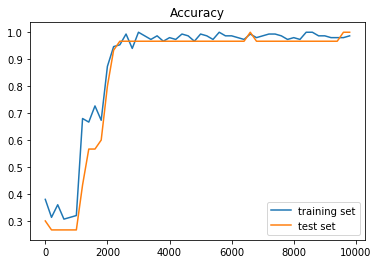

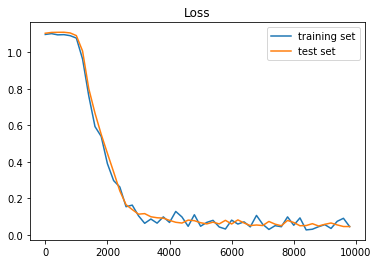

In [13]:
plt.clf()

l2_lists = range(0, l2_iters_num, l2_plot_interval)
plt.plot(l2_lists, l2_accuracies_train, label="training set")
plt.plot(l2_lists, l2_accuracies_test,  label="test set")
plt.legend(loc="best")
plt.title("Accuracy")
# グラフの表示
plt.show()

plt.clf()

l2_lists = range(0, l2_iters_num, l2_plot_interval)
plt.plot(l2_lists, l2_losses_train, label="training set")
plt.plot(l2_lists, l2_losses_test,  label="test set")
plt.legend(loc="best")
plt.title("Loss")
# グラフの表示
plt.show()

### ・中間層1層の場合

In [14]:
#ハイパーパラメータの設定

# 重み初期値補正係数
l1_weight_init = 0.01
#入力層サイズ
l1_input_layer_size = 4
#中間層サイズ
l1_hidden_layer_size = 100
#出力層サイズ
l1_output_layer_size = 3
# 繰り返し数
l1_iters_num = 10000
# ミニバッチサイズ
l1_batch_size = 100
# 学習率
l1_learning_rate = 0.01
# 描写頻度
l1_plot_interval=200

In [15]:
# 初期設定
def l1_init_network():
    network = {} 
    network['W1'] = l1_weight_init * np.random.randn(l1_input_layer_size, l1_hidden_layer_size)
    network['W2'] = l1_weight_init * np.random.randn(l1_hidden_layer_size, l1_output_layer_size)

    network['b1'] = np.zeros(l1_hidden_layer_size)
    network['b2'] = np.zeros(l1_output_layer_size)

    return network

# 順伝播
def l1_forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2  = network['b1'], network['b2']
        
    u1 =  np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 =  np.dot(z1, W2) + b2
    y = functions.softmax(u2)
 
    return z1, y

# 誤差逆伝播
def l1_backward(network, x, d, z1, y):
    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 出力層でのデルタ
    delta2 = functions.d_softmax_with_loss(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# 正答率と誤差
def l1_accuracy_and_loss(network, x, d):
    z1, y = l1_forward(network, x)
    # 誤差の取得
    loss = functions.cross_entropy_error(d, y)
    # 正答率の取得
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    
    return accuracy, loss

In [16]:
# パラメータの初期化
l1_network = l1_init_network()

# グラフ描画の為の配列
# 学習時および検証時の正答率
l1_accuracies_train = []
l1_accuracies_test = []

l1_losses_train = []
l1_losses_test = []

for i in range(l1_iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, l1_batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]
    
    z1, y = l1_forward(l1_network, x_batch)
    grad = l1_backward(l1_network, x_batch, d_batch, z1, y)

    if (i+1)%l1_plot_interval==0:
        accr_train, loss_train = l1_accuracy_and_loss(l1_network, x_batch, d_batch)
        l1_accuracies_train.append(accr_train)
        l1_losses_train.append(loss_train)
    
        accr_test, loss_test = l1_accuracy_and_loss(l1_network, x_test, d_test)
        l1_accuracies_test.append(accr_test)
        l1_losses_test.append(loss_test)
        
        print('Generation: ' + str(i+1) + '  accr_train = ' + '{:.3f}'.format(accr_train)
              + 'm accr_test = ' + '{:.3f}'.format(accr_test) 
              + ', loss_train = ' + '{:.3f}'.format(loss_train)
              + ', loss_test = ' + '{:.3f}'.format(loss_test))
    
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        l1_network[key]  -= l1_learning_rate * grad[key]

Generation: 200  accr_train = 0.380m accr_test = 0.300, loss_train = 1.007, loss_test = 1.033
Generation: 400  accr_train = 0.720m accr_test = 0.567, loss_train = 0.636, loss_test = 0.714
Generation: 600  accr_train = 0.850m accr_test = 0.733, loss_train = 0.433, loss_test = 0.501
Generation: 800  accr_train = 0.980m accr_test = 0.933, loss_train = 0.318, loss_test = 0.397
Generation: 1000  accr_train = 0.940m accr_test = 0.933, loss_train = 0.314, loss_test = 0.325
Generation: 1200  accr_train = 1.000m accr_test = 0.967, loss_train = 0.205, loss_test = 0.260
Generation: 1400  accr_train = 0.980m accr_test = 0.967, loss_train = 0.190, loss_test = 0.224
Generation: 1600  accr_train = 0.990m accr_test = 0.967, loss_train = 0.145, loss_test = 0.197
Generation: 1800  accr_train = 0.970m accr_test = 0.967, loss_train = 0.167, loss_test = 0.161
Generation: 2000  accr_train = 1.000m accr_test = 0.967, loss_train = 0.120, loss_test = 0.145
Generation: 2200  accr_train = 0.990m accr_test = 0.96

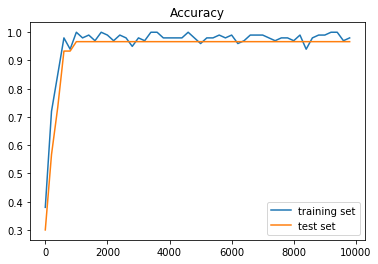

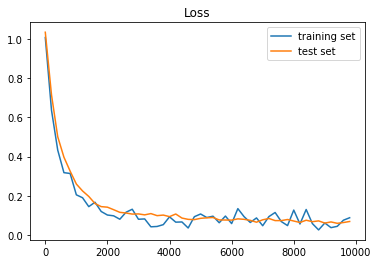

In [17]:
l1_lists = range(0, l1_iters_num, l1_plot_interval)
plt.plot(l1_lists, l1_accuracies_train, label="training set")
plt.plot(l1_lists, l1_accuracies_test,  label="test set")
plt.legend(loc="best")
plt.title("Accuracy")
# グラフの表示
plt.show()

plt.clf()

l1_lists = range(0, l1_iters_num, l1_plot_interval)
plt.plot(l1_lists, l1_losses_train, label="training set")
plt.plot(l1_lists, l1_losses_test,  label="test set")
plt.legend(loc="best")
plt.title("Loss")
# グラフの表示
plt.show()